<a href="https://colab.research.google.com/github/Rizwan-analytics/data_analysis_portfolio/blob/main/bike_details_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [10]:
# define the name of dataset and how can we read it
df = pd.read_csv('/content/BIKE DETAILS.csv')


In [13]:
# first five rows
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [14]:
# check the data types
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [15]:
# check null values in this dataset
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [17]:
df['ex_showroom_price'].unique()

array([     nan,  148114.,   89643.,   53857.,   87719.,   60122.,
         78712.,   47255.,   95955.,  351680.,   58314.,  117926.,
        132680.,   44389.,   53900.,   56147.,   84751.,   61600.,
         79432.,   78350.,   71049.,   57557.,  202310.,   71150.,
         56750.,   84042.,   69750.,   59844.,   42859.,   73413.,
         49900.,   59422.,   57549.,   51994.,   80350.,   54605.,
         88161.,   78513.,   50098.,  195500.,   92074.,  164004.,
         74295.,   49642.,   51112.,   53751.,   50267.,   61653.,
         70851.,   53079.,  133680.,  181445.,   65626.,   58438.,
         61118.,   75936.,  180525.,   87543.,   80435.,   85011.,
       1278000.,  155740.,  202127.,   86744.,  156304.,   84246.,
         49521.,   64589.,   69983.,   54299.,   72303.,   65800.,
         58757.,   47032.,   79233.,  118997.,   52949.,   64071.,
         61545.,  168482.,  163331.,   59095.,   75502.,   52271.,
         63331.,   52372.,   58630.,   94703.,   53436.,   591

In [19]:
# null value fill with median
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())

In [22]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


In [37]:
#  What is the range of selling prices in the dataset?
# What is the median selling price for bikes in the dataset
df['selling_price'].min(), df['selling_price'].max(), df['selling_price'].median()


(5000, 760000, 45000.0)

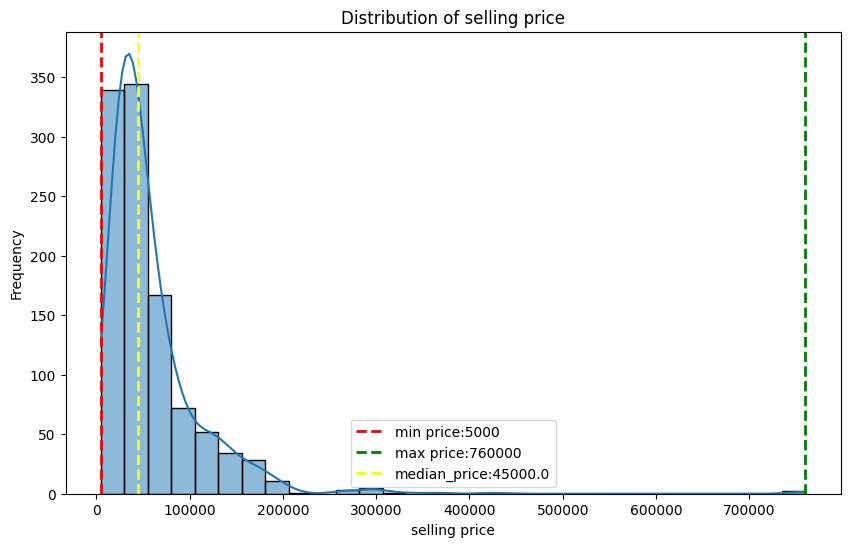

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of selling price')
plt.xlabel('selling price')
plt.ylabel('Frequency')

# add vertical lines for min, max selling price and median selling price
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
median_price = df['selling_price'].median()
plt.axvline(min_price, color = 'red', linestyle = 'dashed', linewidth = 2, label=f'min price:{min_price}')
plt.axvline(max_price, color = 'green', linestyle = 'dashed', linewidth =2, label= f'max price:{max_price}')
plt.axvline(median_price, color = 'yellow', linestyle='dashed', linewidth = 2, label = f'median_price:{median_price}')
plt.legend()
plt.show()

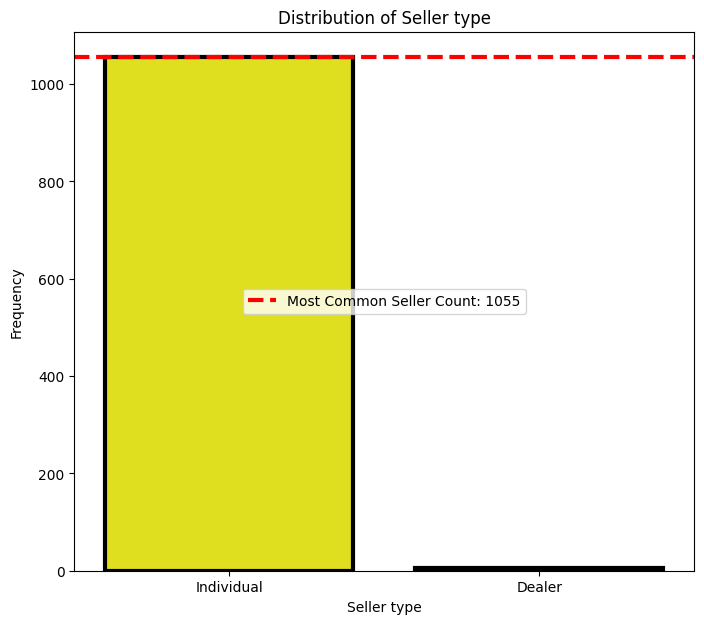

In [59]:
plt.figure(figsize=(8, 7))
sns.countplot(x='seller_type', data=df, color='yellow', edgecolor = 'black', linewidth=3)
plt.title('Distribution of Seller type')
plt.xlabel('Seller type')
plt.ylabel('Frequency')

# Add horizontal line for most common seller
seller_counts = df['seller_type'].value_counts()
most_common_seller_count = seller_counts.max() # or seller_counts.iloc[0] if sorted by default

plt.axhline(most_common_seller_count, color='red', linestyle='dashed',linewidth=3, label = f'Most Common Seller Count: {most_common_seller_count}')
plt.legend(loc='center')
plt.show()

In [62]:
#  How many bikes have driven more than 50,000 kilometers?
bikes_driven_more_than_50000 = df[df['km_driven']>50000]
print(len(bikes_driven_more_than_50000))

170


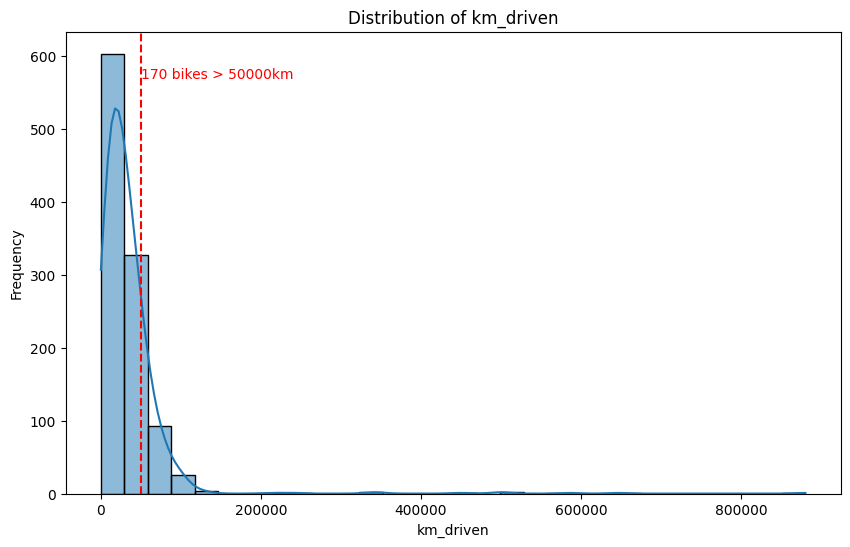

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(df['km_driven'], kde=True, bins=30)
plt.title('Distribution of km_driven')
plt.xlabel('km_driven')
plt.ylabel('Frequency')

# add vertical line for bikes driven more than 50,000
plt.axvline(x=50000, color='r', linestyle='--')

bikes_driven_more_than_50000_count = len(df[df['km_driven'] > 50000])
plt.text(50000, plt.ylim()[1]*0.9, f'{bikes_driven_more_than_50000_count} bikes > 50000km', color='red', ha='left')

plt.show()

In [68]:
# What is the average km_driven value for each ownership type?
avg_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print(avg_driven_by_ownership)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [71]:
# What proportion of bikes are from the year 2015 or older?
bikes_from_2015_or_older = df[df['year'] >= 2015]
proportion_from_2015_or_older = len(bikes_from_2015_or_older) / len(df)
rounded_proportion = round(proportion_from_2015_or_older, 2)

print(rounded_proportion)

0.53


In [72]:
# What is the trend of missing values across the dataset
missing_values = df.isnull().sum()
print(missing_values)

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


In [73]:
# What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price = df.loc[df['ex_showroom_price'].idxmax()]
print(highest_ex_showroom_price)

name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [75]:
# What is the total number of bikes listed by each seller type?
bike_count_by_seller_type = df['seller_type'].value_counts()
print(bike_count_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [79]:
# What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == '1st owner']
print(first_owner_bikes)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
5                        Honda CB Twister          18000  2010  Individual   
...                                   ...            ...   ...         ...   
1055                        Bajaj  ct 100          18000  2017  Individual   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

In [ ]:
#  Identify and remove outliers in the km_driven column using the IQR method?


In [83]:
# Calculate Q1, Q3, and IQR for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print("Number of outliers identified:", len(outliers))
print("Outliers:")
display(outliers)

# Remove outliers from the DataFrame
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

print("\nShape of the original DataFrame:", df.shape)
print("Shape of the DataFrame after removing outliers:", df_no_outliers.shape)

Number of outliers identified: 39
Outliers:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
91,Honda Activa [2000-2015],22989,2012,Individual,1st owner,500000,50267.0
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
115,Hero Honda Passion Plus,7500,2004,Individual,1st owner,120000,72752.5
135,Hero Honda CBZ extreme,20000,2007,Individual,1st owner,90000,72752.5
154,Hero Xtreme Sports,22000,2014,Individual,1st owner,99000,78350.0
184,Honda CB Unicorn 160,75000,2015,Individual,1st owner,100000,79233.0
363,Hero Honda CD100SS,10000,1997,Individual,1st owner,646000,72752.5
470,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0
474,Hero Honda Passion PRO [2012],12000,2012,Individual,1st owner,90000,72752.5
477,Honda Activa [2000-2015],25000,2009,Individual,1st owner,585659,50267.0



Shape of the original DataFrame: (1061, 7)
Shape of the DataFrame after removing outliers: (1022, 7)


In [ ]:
#  Perform a bivariate analysis to visualize the relationship between year and selling_price


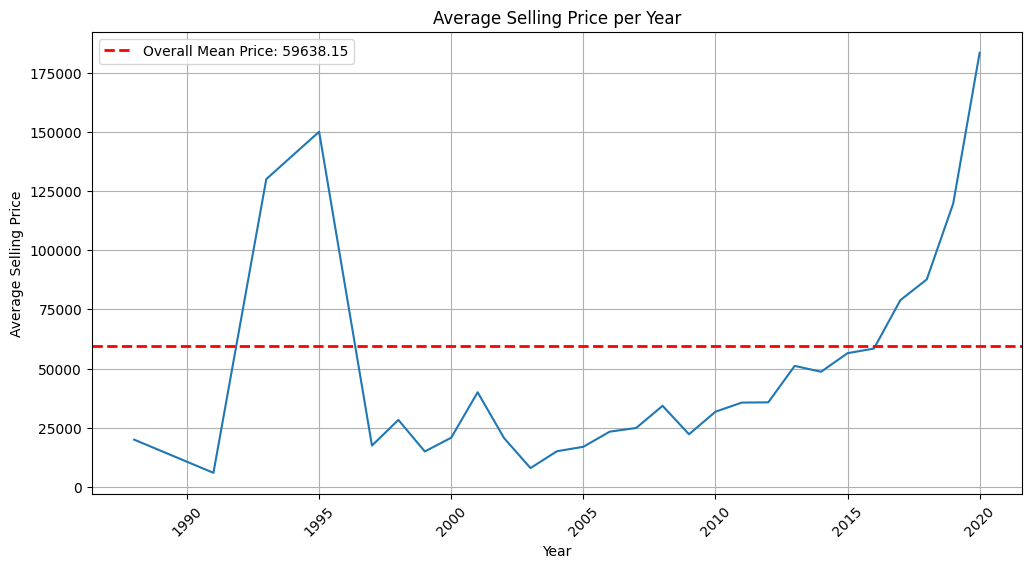

In [87]:
# Calculate the average selling price per year
average_selling_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()

# Create a line plot of the average selling price per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='selling_price', data=average_selling_price_per_year)
plt.title('Average Selling Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.grid(True)

# Calculate the overall mean selling price
overall_mean_price = df['selling_price'].mean()

# Add a horizontal line for the overall mean selling price
plt.axhline(overall_mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Overall Mean Price: {overall_mean_price:.2f}')
plt.legend()

plt.show()

In [ ]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)


In [88]:
# Assume the current year is 2024
current_year = 2024

# Calculate the age of each bike
df['bike_age'] = current_year - df['year']

# Calculate the average selling price for each bike age
average_selling_price_by_age = df.groupby('bike_age')['selling_price'].mean().reset_index()

# Display the results
display(average_selling_price_by_age)

,bike_age,selling_price
0,4,183333.333333
1,5,119689.511628
2,6,87660.374046
3,7,78894.736842
4,8,58469.018692
5,9,56500.000000
6,10,48668.131868
7,11,51136.986301
8,12,35748.400000
9,13,35655.721311
